In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc
import seaborn as sns
import sys

# sys.path.append("/home/icb/giovanni.palla/code/spatial-alignment/data")
# from data.simulated.generate_twod_data import generate_twod_data_partial_overlap

%load_ext autoreload
%autoreload 2
%load_ext lab_black

In [3]:
adata = sc.read(
    "/home/icb/giovanni.palla/code/spatial-alignment/examples/synthetic_data.h5ad"
)

In [4]:
adata.obs_names

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '190', '191', '192', '193', '194', '195', '196', '197', '198', '199'],
      dtype='object', length=200)

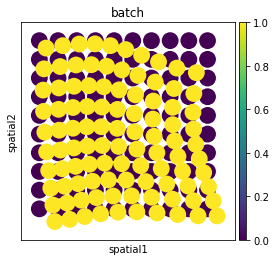

In [5]:
sc.pl.spatial(adata, spot_size=1, color="batch")

In [5]:
sys.path.append("/home/icb/giovanni.palla/code/spatial-alignment")
sys.path.append("/home/icb/giovanni.palla/code/spatial-alignment/data")
from data.simulated.generate_twod_data import (
    generate_twod_data,
    generate_twod_data_partial_overlap,
)
from data.simulated.generate_oned_data import generate_oned_data_gp_warp

In [6]:
from itertools import product
from sklearn.preprocessing import StandardScaler
from anndata import AnnData

In [7]:
n_views = [1]
n_outputs = [500, 1000]
grid_size = [20, 40]
n_latent_gps = [50]
kernel_lengthscale = [5, 15]
adata_list = []
for el in product(n_views, n_outputs, grid_size, n_latent_gps, kernel_lengthscale):
    n_views, n_outputs, grid_size, n_latent_gps, kernel_lengthscale = el
    X, Y, n_samples_list, view_idx = generate_twod_data(
        n_views=n_views,
        n_outputs=n_outputs,
        grid_size=grid_size,
        n_latent_gps=n_latent_gps,
        kernel_lengthscale=kernel_lengthscale,
        kernel_variance=1,
    )
    X = StandardScaler().fit_transform(X)
    Y = StandardScaler().fit_transform(Y)
    adata = AnnData(Y)

    adata.obsm["spatial"] = X
    batch = np.ones(adata.shape[0])
    batch[view_idx[0]] = 0
    adata.obs["batch"] = pd.Categorical(batch.astype(int))
    adata.obs["idx"] = np.hstack([view_idx[0], view_idx[0]])
    # sc.pp.subsample(adata, fraction=0.9)
    adata.obs_names_make_unique()
    adata_list.append(adata)

In [8]:
import anndata as ad

adata = ad.concat(adata_list, label="synth_batch")

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


Trying to set attribute `._uns` of view, copying.


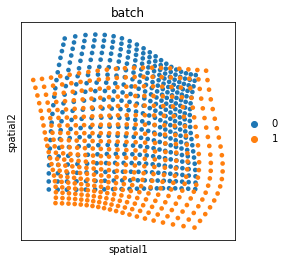

In [23]:
sc.pl.spatial(adata[adata.obs.synth_batch == "4"], spot_size=0.1, color="batch")

In [1]:
adata.write("/lustre/groups/ml01/workspace/giovanni.palla/moscot/data/alignment.h5ad")

In [6]:
adata = sc.read(
    "/lustre/groups/ml01/workspace/giovanni.palla/moscot/data/alignment.h5ad"
)

/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [7]:
adata.obs

,batch,idx,synth_batch
0,0,0,0
1,0,1,0
2,0,2,0
3,0,3,0
4,0,4,0
...,...,...,...
3195,1,1595,7
3196,1,1596,7
3197,1,1597,7
3198,1,1598,7
